In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import h5py
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import cv2
import requests
from io import BytesIO
from PIL import ImageDraw
from PIL import ImageFont



# Read Data

In [2]:
data="/kaggle/input/capstone-project/SVHN_single_grey1.h5"

In [3]:
df=h5py.File(data,'r')   

In [4]:
final_data=np.array(df)

In [5]:
final_data

array(['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val'],
      dtype='<U7')

In [6]:
list(df.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

# Convert All Images Into Numpy Array

In [7]:
train_data=np.array(df["X_train"])
test_data=np.array(df["X_test"])
valid_data=np.array(df["X_val"])

# Conver Images Label Data Into Numpy Array

In [8]:
train_label_data=np.array(df["y_train"])
test_label_data=np.array(df["y_test"])
valid_label_data=np.array(df["y_val"])

# Data Analysis

In [9]:
print("Train Data Shape {}\nTest Data Shape{}\nValid Data Shape{}".format(train_data.shape,test_data.shape,valid_data.shape))

Train Data Shape (42000, 32, 32)
Test Data Shape(18000, 32, 32)
Valid Data Shape(60000, 32, 32)


In [10]:
print("Train Label Data Shape {}\nTest Label Data Shape{}\nValid Label Data Shape{}".format(train_label_data.shape,test_label_data.shape,valid_label_data.shape))

Train Label Data Shape (42000,)
Test Label Data Shape(18000,)
Valid Label Data Shape(60000,)


# Train ,Test,valid Data Visualize With Pie Chart

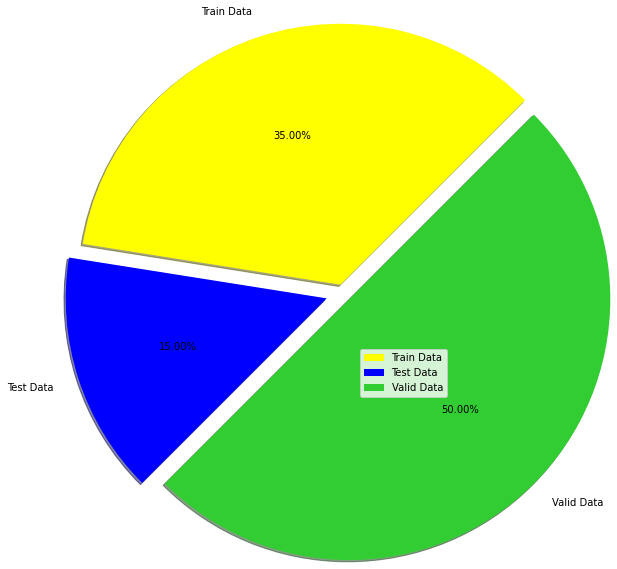

In [11]:
my_label=["Train Data","Test Data","Valid Data"]
explode = (0.1, 0.2, 0.1)
y=np.array([42000,18000,60000])
my_color=["yellow","blue","limegreen"]
plt.pie(y,labels=my_label,radius=3,autopct='%1.2f%%',explode=explode,shadow=True, startangle=45,colors=my_color)
plt.legend(loc="best")
plt.show()

# Train ,Test ,Valid Label Data Visualize With Pie Chart

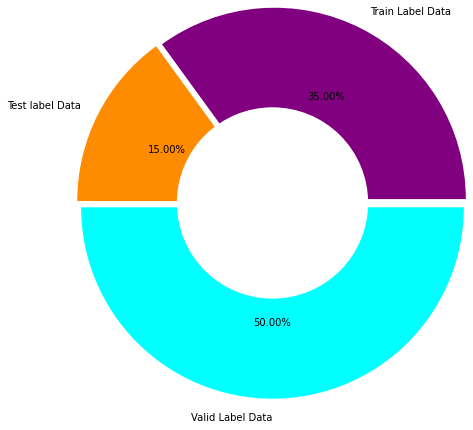

In [12]:
my_label=["Train Label Data","Test label Data","Valid Label Data"]
explode = (0.05,0.05,0.05)
x=np.array([42000,18000,60000])
my_color=["purple","darkorange","cyan"]
plt.pie(x,labels=my_label,radius=2.2,autopct='%.2f%%',explode=explode,colors=my_color)
centre_circle = plt.Circle((0,0),1.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [13]:
train_data[3]

array([[147.6196, 139.6204, 142.6201, ..., 151.1631, 151.8641, 148.8644],
       [146.6197, 137.6206, 140.9084, ..., 151.1631, 149.8643, 150.8642],
       [145.6198, 136.9088, 139.9085, ..., 151.8641, 150.8642, 151.8641],
       ...,
       [106.1785,  99.2393, 101.5981, ..., 157.9021, 156.8914, 156.8914],
       [111.879 , 112.238 , 113.0099, ..., 157.1302, 156.8914, 157.1795],
       [122.8779, 127.2365, 128.2364, ..., 157.1194, 157.1795, 157.1795]],
      dtype=float32)

In [14]:
train_data[0].shape

(32, 32)

# Before Scaling Maximum And Minimum Value

In [15]:
print(f"Maximum Value is {train_data[99].max()}")

Maximum Value is 99.41549682617188


In [16]:
print(f"Minimum Value is {train_data[99].min()}")

Minimum Value is 17.62849998474121


In [17]:
train_label_data[19]

4

# Visualize Images From Train Data

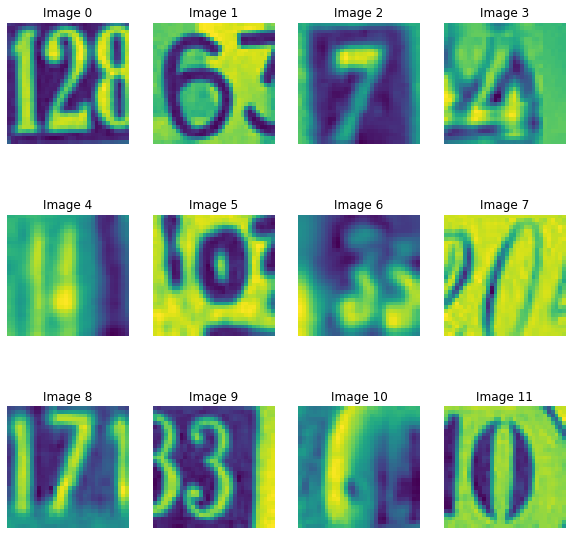

In [18]:
plt.figure(figsize=(10, 10))

for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(train_data[i]) 
    plt.title("Image %s" % i)
    plt.axis('off')

plt.show()


In [19]:
test_data[14]

array([[109.5234, 104.5131, 103.5024, ..., 116.7756, 117.1346, 117.1346],
       [134.222 , 131.9834, 131.8586, ..., 114.292 , 115.8358, 116.1347],
       [168.7625, 168.5237, 170.2847, ..., 110.4064, 111.4772, 112.1351],
       ...,
       [112.3399, 136.6965, 168.1664, ..., 104.0542, 107.9398, 116.9389],
       [127.2244, 141.109 , 157.4664, ..., 107.9398, 107.5269, 111.4125],
       [134.3377, 139.1092, 141.468 , ..., 112.1135, 104.0003, 103.8863]],
      dtype=float32)

In [20]:
test_data[14].shape

(32, 32)

In [21]:
test_label_data[22]

5

# Visualize Data  From Test Data

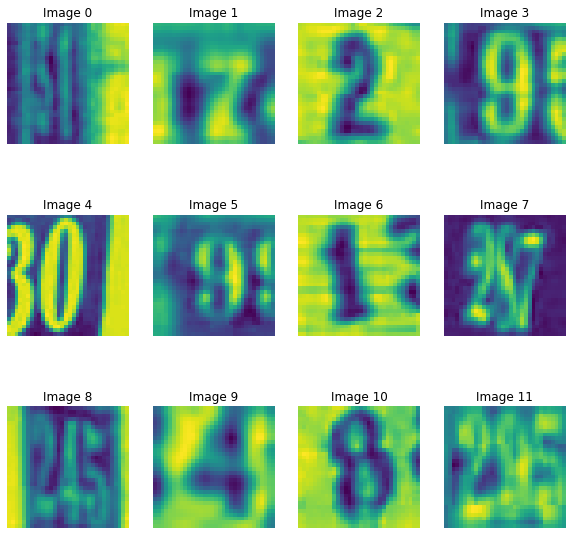

In [22]:
plt.figure(figsize=(10, 10))

for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(test_data[i]) 
    plt.title("Image %s" % i)
    plt.axis('off')

plt.show()

In [23]:
valid_data[30]

array([[ 99.833 , 100.306 , 100.192 , ...,  97.7361,  97.9641,  97.7191],
       [102.9467,  98.8331,  97.6052, ...,  97.448 ,  97.79  ,  97.431 ],
       [104.5875,  95.6485,  92.4208, ...,  96.975 ,  97.7299,  99.2567],
       ...,
       [100.2798,  99.4648, 100.5787, ..., 100.7897,  99.5017,  99.0888],
       [101.2797, 100.9916, 103.4043, ..., 100.7897,  99.5017,  99.0888],
       [103.1054, 102.1055, 103.6323, ..., 100.7897, 100.0887,  99.0888]],
      dtype=float32)

In [24]:
valid_data[30].shape

(32, 32)

In [25]:
valid_label_data[32]

0

# Visualize Data From Valid Data

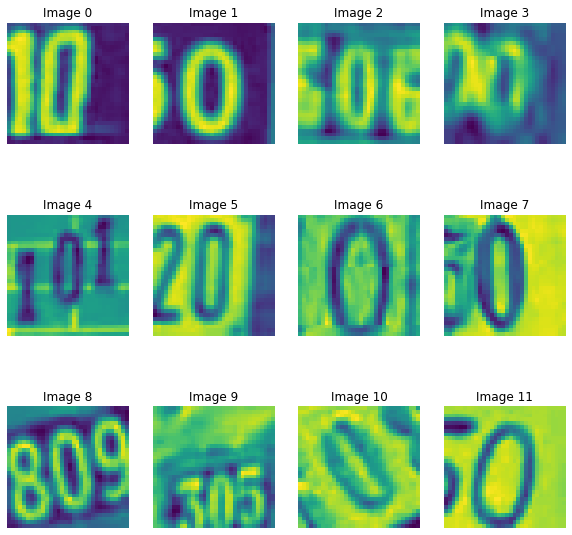

In [26]:
plt.figure(figsize=(10, 10))

for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(valid_data[i]) 
    plt.title("Image %s" % i)
    plt.axis('off')

plt.show()

# use min-max scaler to make max value as 1 and min value as 0

In [27]:

scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data.reshape(-1, train_data.shape[-1])).reshape(train_data.shape)
test_data = scaler.transform(test_data.reshape(-1, test_data.shape[-1])).reshape(test_data.shape)
valid_data= scaler.transform(valid_data.reshape(-1, valid_data.shape[-1])).reshape(valid_data.shape)

In [28]:
train_data.shape

(42000, 32, 32)

# After Scaling  Maximum  And Minimum Value

In [29]:
print(f"Maximum Value is {train_data[24].max()}")

Maximum Value is 0.7893652319908142


In [30]:
print(f"Maximum Value is {train_data[24].min()}")

Maximum Value is 0.524049699306488


# Reshape Data Convert Dimension 3 To 4

In [31]:
train_data=tf.reshape(train_data, (-1, 32,32, 1))
test_data=tf.reshape(test_data, (-1, 32,32, 1))
valid_data=tf.reshape(valid_data, (-1, 32,32, 1))

2023-01-24 16:23:04.554691: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 16:23:04.555725: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 16:23:04.564700: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 16:23:04.565528: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 16:23:04.566256: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

# Create Custom Convolutional Neural Network (CNN)

In [32]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,1)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,1)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,1)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 32)          128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          9

In [34]:
history=model.fit(train_data,train_label_data,validation_data=(valid_data,valid_label_data),batch_size=32,epochs=30)

2023-01-24 16:23:07.138174: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2023-01-24 16:23:08.292083: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1313/1313 [==============================] - 13s 8ms/step - loss: 0.7664 - accuracy: 0.7558 - val_loss: 0.5065 - val_accuracy: 0.8451
Epoch 2/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.4220 - accuracy: 0.8719 - val_loss: 0.3947 - val_accuracy: 0.8812
Epoch 3/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3537 - accuracy: 0.8931 - val_loss: 0.4125 - val_accuracy: 0.8730
Epoch 4/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3108 - accuracy: 0.9060 - val_loss: 0.3059 - val_accuracy: 0.9090
Epoch 5/30
1313/1313 [==============================] - 10s 7ms/step - loss: 0.2815 - accuracy: 0.9148 - val_loss: 0.3283 - val_accuracy: 0.9000
Epoch 6/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2584 - accuracy: 0.9218 - val_loss: 0.2645 - val_accuracy: 0.9224
Epoch 7/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2397 - accuracy: 0.9274 - val_loss: 0.3313 - val_accuracy: 0.8982

In [35]:
def model_loss_and_accuracy(history):
    
    fig=plt.figure(figsize=(10,10))
    plt.subplot(221)
    plt.plot(history.history["accuracy"],"b*--",label="accuracy")
    plt.plot(history.history["val_accuracy"],"r*--",label="val_accuracy")
    plt.title("Model Accuracy\n",fontsize=20,color="darkorange")
    plt.xlabel("Number of Epochs",color="midnightblue",fontsize=15)
    plt.ylabel("Accuracy",color="midnightblue",fontsize=15)
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()
    
  
    plt.subplot(222)
    plt.plot(history.history["loss"],"b.--",label="loss")
    plt.plot(history.history["val_loss"],"r.--",label="val_loss")
    plt.title("Model Loss\n",fontsize=20,color="limegreen")
    plt.xlabel("Number of Epochs",color="midnightblue",fontsize=15)
    plt.ylabel("Loss",color="midnightblue",fontsize=15)
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

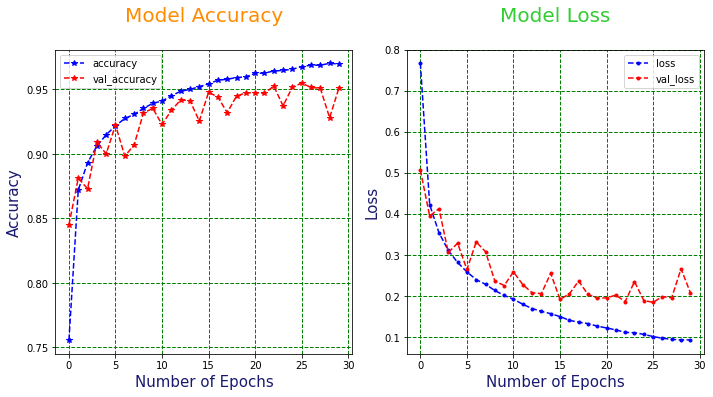

In [36]:
 model_loss_and_accuracy(history)

# Evaluate The Model

In [37]:
eva=model.evaluate(test_data,test_label_data)

563/563 [==============================] - 2s 3ms/step - loss: 0.4927 - accuracy: 0.9021


In [38]:
print(f"Model Loss is {eva[0]}")

Model Loss is 0.49274784326553345


In [39]:
print(f"Model Accuracy is {eva[1]}")

Model Accuracy is 0.9021111130714417


In [40]:
pred=model.predict(test_data)
prediction=np.argmax(pred,axis=1)

In [41]:
pred.shape

(18000, 10)

# ROC Curve
* **use label encoder for transform label data**
* **binarized label data**

In [42]:

label_encoder=LabelEncoder()
label_encoder.fit(test_label_data)
test_label_data=label_encoder.transform(test_label_data)
classes=label_encoder.classes_

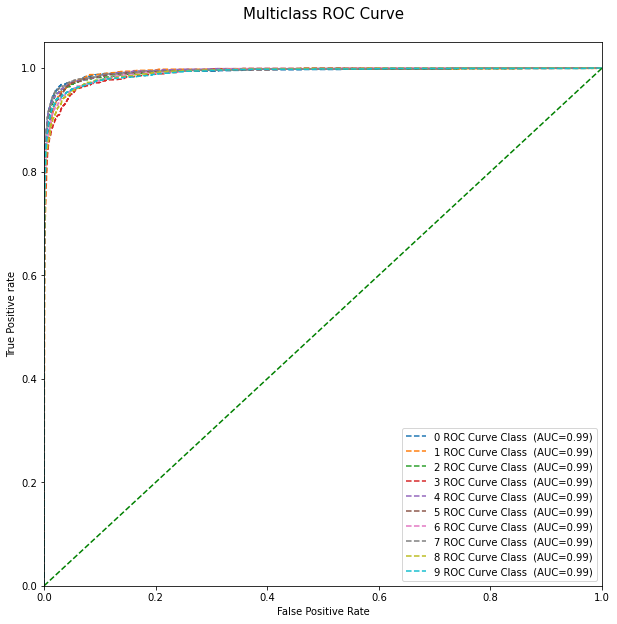

In [43]:
plt.figure(figsize=(10,10))
#binarize the Label_Data
label_binarized=label_binarize(test_label_data,classes=np.unique(test_label_data))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

number_class = classes.shape[0]

for i in range(number_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(label_binarized[:,i], pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    
    plt.plot(fpr[i], tpr[i], linestyle="--", label='%s ROC Curve Class  (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'g--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve\n',color="black",fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix

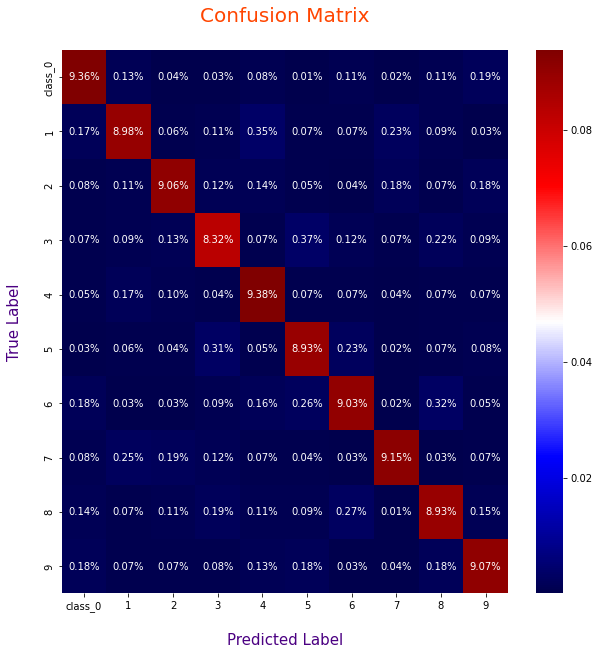

In [44]:
plt.figure(figsize=(10,10))
my_label=["class_0",1,2,3,4,5,6,7,8,9]
cf_matrix=confusion_matrix(test_label_data,prediction)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='seismic',xticklabels=my_label,yticklabels=my_label)
plt.title("Confusion Matrix\n",fontsize=20,color="orangered")
plt.xlabel("\nPredicted Label",color="indigo",fontsize=15)
plt.ylabel("True Label\n",color="indigo",fontsize=15)
plt.show()

# Classification Report

In [45]:
my_label=["ZERO","ONE","TWO","THREE","FOUR","FIVE","SIX","SEVEN","EIGHT","NINE"]
print(classification_report(test_label_data,prediction,target_names=my_label))

              precision    recall  f1-score   support

        ZERO       0.91      0.93      0.92      1814
         ONE       0.90      0.88      0.89      1828
         TWO       0.92      0.90      0.91      1803
       THREE       0.88      0.87      0.88      1719
        FOUR       0.89      0.93      0.91      1812
        FIVE       0.89      0.91      0.90      1768
         SIX       0.90      0.89      0.90      1832
       SEVEN       0.94      0.91      0.92      1808
       EIGHT       0.88      0.89      0.89      1812
        NINE       0.91      0.91      0.91      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



#  Data Prediction 

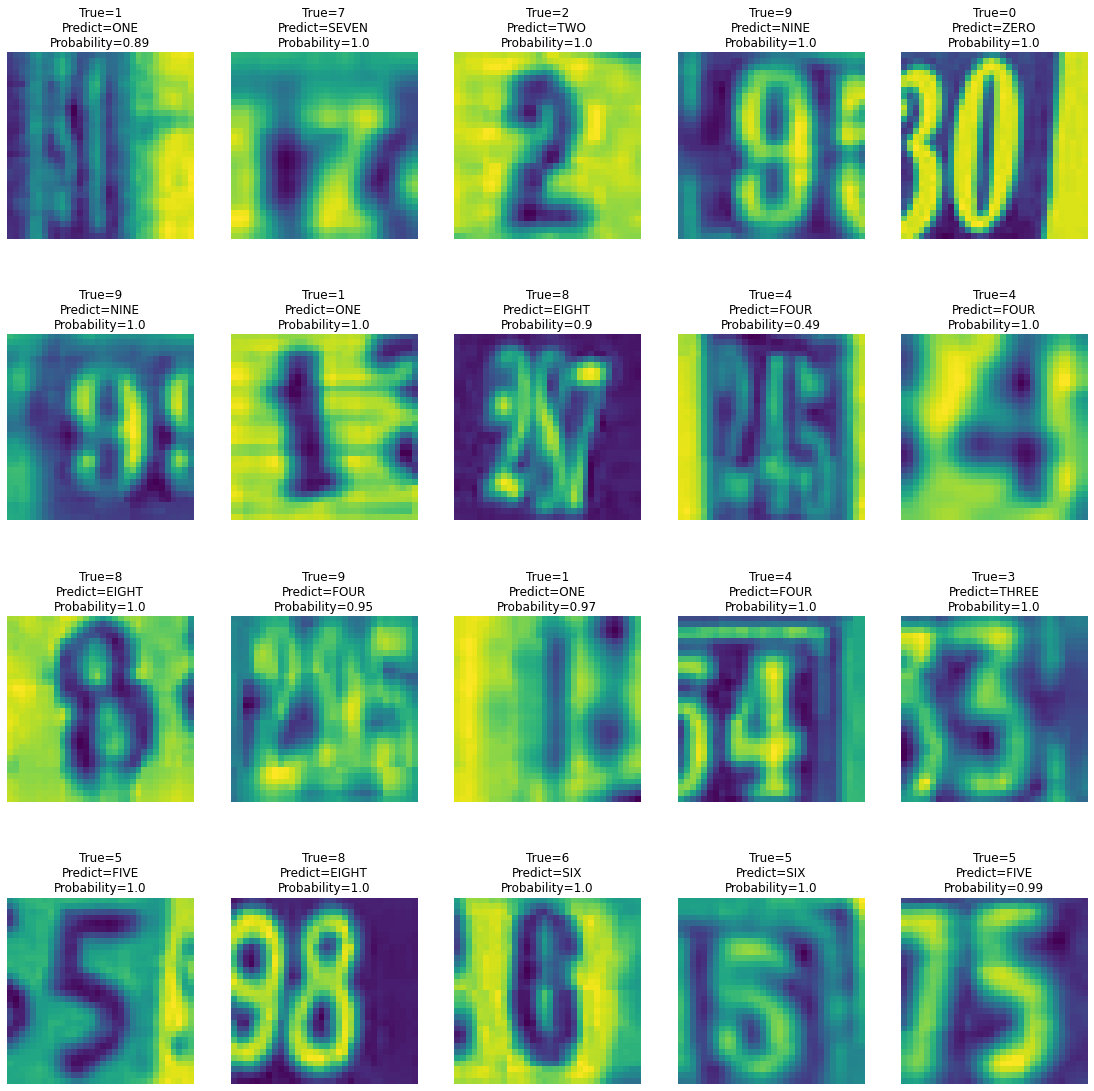

In [46]:
row=4
column=5
fig,ax=plt.subplots(4,5)
fig.set_size_inches(15,15)

index=0
for m in range(0,row):
    for n in range(0,column):
        true_data=test_label_data[index]
        pred_data=prediction[index]
        probability=round(pred[index][pred_data],2)
        ax[m][n].axis("off")
        ax[m][n].set_title("True=" +str(true_data)+"\nPredict="+str(my_label[pred_data])+"\nProbability="+str(probability))
        ax[m][n].imshow(test_data[index])
        index +=1
        
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.20)   

# Custom Data Prediction

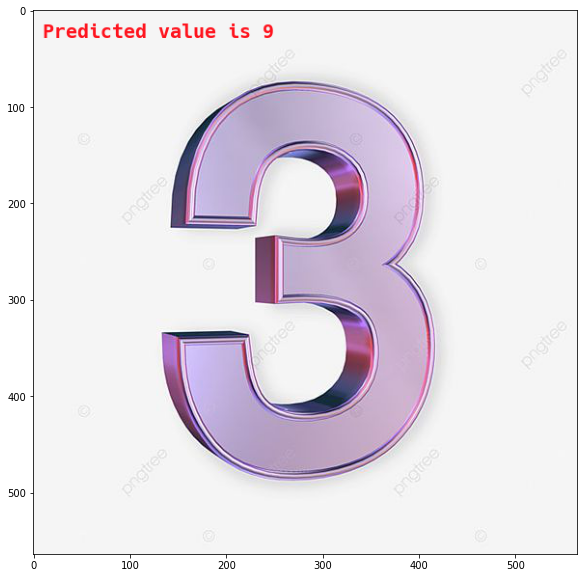

In [47]:
plt.figure(figsize=(10,10))
results={0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9}
image_size=(32,32)
myFont =ImageFont.truetype('/kaggle/input/hack-font/Hack-Bold.ttf', 20)
# image_path=Image.open("/kaggle/input/image-1/3_31.png")
response = requests.get("https://i.pinimg.com/564x/a2/75/ab/a275abf81cb4d70b842996974e0acf17.jpg")
image_path = Image.open(BytesIO(response.content))
image_resize=image_path.resize(image_size)
image_array=np.array(image_resize)
image_scale=scaler.fit_transform(image_array.reshape(-1, image_array.shape[-1])).reshape(image_array.shape)
image_reshape=tf.reshape(image_scale, (-1, 32,32, 1))
final_pred=model.predict([image_reshape])[0]
max_prob=np.argmax(final_pred,axis=0)
my_predict=results[max_prob]
image_draw= ImageDraw.Draw(image_path)
# add text to image
image_draw.text((10,10), str(f"Predicted value is {my_predict}"), font=myFont,fill=(255, 20,30))

image_path.save("my_image.png")

my_image=Image.open("/kaggle/working/my_image.png")
plt.imshow(my_image)
plt.show()
